# K-Prototypes

In [ ]:
#!pip install kmodes

## Import Libraries and Dataset

In [111]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns  

from kmodes.kprototypes import KPrototypes
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import LabelEncoder


In [112]:
df = pd.read_csv('Data/train_dataset.csv')
df.shape

(9442, 46)

In [114]:
categorical_cols = [
    "General_hearing_condition",
    "Had_high_blood_pressure",
    "Gender",
    "Race_Ethnicity",
    "Country_of_Birth",
    "Education_Level",
    "Marital_Status",
    "Has_diabetes",
    "Takes_vitamin_supplements",
    "Has_Disability",
    "Has_Hepatitis",
    "Covered_by_health_insurance",
    "Tested_for_HIV_Virus",
    "General_health_condition",
    "Received_Hepatitis_A_Vaccine",
    "Has_Kidney_Failure",
    "Had_Asthma",
    "Had_Arthritis",
    "Had_heart_attack",
    "Had_Thyroid",
    "Had_Liver_COndition",
    "Had_Cancer",
    "Teeth_and_gum_health",
    "functional_difficulty_composite",
    "Age_Group"
]

numerical_cols = [col for col in df.columns if col not in categorical_cols]


## Encoding

In [115]:
df = df.replace({
    "Don't know": "Unknown",
    "Refused": "Unknown",
    "Not Applicable": "Unknown",
    "N/A": "Unknown",
    "Unknown/NA": "Unknown"
})

In [116]:
le_dict = {}
for col in categorical_cols:
    le = LabelEncoder()
    df[col] = df[col].astype(str)
    df[col] = le.fit_transform(df[col])
    le_dict[col] = le  # save encoder for later decoding


In [117]:
scaler = StandardScaler()
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])


## Find K

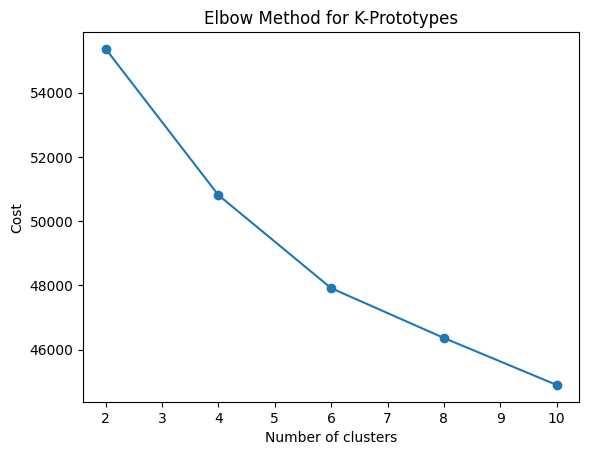

In [118]:
cost = []
K = [2, 4, 6, 8, 10]

for k in K:
    kproto = KPrototypes(n_clusters=k, init='Cao', verbose=0, random_state=42)
    clusters = kproto.fit_predict(matrix, categorical=cat_idx)
    cost.append(kproto.cost_)

import matplotlib.pyplot as plt

plt.plot(K, cost, marker='o')
plt.xlabel("Number of clusters")
plt.ylabel("Cost")
plt.title("Elbow Method for K-Prototypes")
plt.show()


## K-Prototypes for different cluster sizes

In [119]:
from kmodes.kprototypes import KPrototypes

# Convert to numpy
matrix = df.to_numpy()

# Find categorical indices
cat_idx = [df.columns.get_loc(col) for col in categorical_cols]

# Train on full dataset with multiple initializations for stability
kproto = KPrototypes(
    n_clusters=4, 
    init='Cao',
    verbose=1,
    n_init=5,       # more initializations = more stable
    max_iter=100,   # default iterations
    random_state=42
)

clusters = kproto.fit_predict(matrix, categorical=cat_idx)

# Save cluster labels
df['Cluster_4'] = clusters

Initialization method and algorithm are deterministic. Setting n_init to 1.
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 1, iteration: 1/100, moves: 3247, ncost: 206968.78464080187
Run: 1, iteration: 2/100, moves: 1973, ncost: 199065.66110851304
Run: 1, iteration: 3/100, moves: 1407, ncost: 194285.03752930777
Run: 1, iteration: 4/100, moves: 327, ncost: 194073.39906748894
Run: 1, iteration: 5/100, moves: 246, ncost: 193968.40147927843
Run: 1, iteration: 6/100, moves: 277, ncost: 193741.28761054119
Run: 1, iteration: 7/100, moves: 275, ncost: 193633.7395272726
Run: 1, iteration: 8/100, moves: 189, ncost: 193552.7828588918
Run: 1, iteration: 9/100, moves: 206, ncost: 193435.55689663877
Run: 1, iteration: 10/100, moves: 260, ncost: 193239.43441038756
Run: 1, iteration: 11/100, moves: 344, ncost: 192887.84874495745
Run: 1, iteration: 12/100, moves: 486, ncost: 192529.62389029536
Run: 1, iteration: 13/100, moves: 271, ncost: 192403.39640300686
Run: 1,

In [ ]:
#!pip install gower

In [120]:
from kmodes.kprototypes import KPrototypes

# Convert to numpy
matrix = df.to_numpy()

# Find categorical indices
cat_idx = [df.columns.get_loc(col) for col in categorical_cols]

# Train on full dataset with multiple initializations for stability
kproto = KPrototypes(
    n_clusters=5,  # change to 6 if you want
    init='Cao',
    verbose=1,
    n_init=5,       # more initializations = more stable
    max_iter=100,   # default iterations
    random_state=42
)

clusters = kproto.fit_predict(matrix, categorical=cat_idx)

# Save cluster labels
df['Cluster_5'] = clusters

Initialization method and algorithm are deterministic. Setting n_init to 1.
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 1, iteration: 1/100, moves: 5004, ncost: 187183.220964997
Run: 1, iteration: 2/100, moves: 1627, ncost: 184453.62971343123
Run: 1, iteration: 3/100, moves: 328, ncost: 184298.02056215925
Run: 1, iteration: 4/100, moves: 109, ncost: 184261.4023147379
Run: 1, iteration: 5/100, moves: 55, ncost: 184254.1969267169
Run: 1, iteration: 6/100, moves: 15, ncost: 184253.2955073151
Run: 1, iteration: 7/100, moves: 9, ncost: 184252.7787909778
Run: 1, iteration: 8/100, moves: 3, ncost: 184252.69994915638
Run: 1, iteration: 9/100, moves: 1, ncost: 184252.69230762357
Run: 1, iteration: 10/100, moves: 0, ncost: 184252.69230762357
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 2, iteration: 1/100, moves: 3991, ncost: 191542.0122600892
Run: 2, iteration: 2/100, moves: 2095, ncost: 186169.43669055015
Run: 2, 

In [121]:
from kmodes.kprototypes import KPrototypes

# Convert to numpy
matrix = df.to_numpy()

# Find categorical indices
cat_idx = [df.columns.get_loc(col) for col in categorical_cols]

# Train on full dataset with multiple initializations for stability
kproto = KPrototypes(
    n_clusters=6,  # change to 6 if you want
    init='Cao',
    verbose=1,
    n_init=5,       # more initializations = more stable
    max_iter=100,   # default iterations
    random_state=42
)

clusters = kproto.fit_predict(matrix, categorical=cat_idx)

# Save cluster labels
df['Cluster_6'] = clusters

Initialization method and algorithm are deterministic. Setting n_init to 1.
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 1, iteration: 1/100, moves: 3011, ncost: 200649.5311456039
Run: 1, iteration: 2/100, moves: 2134, ncost: 188626.00712057692
Run: 1, iteration: 3/100, moves: 2052, ncost: 180435.8811356348
Run: 1, iteration: 4/100, moves: 452, ncost: 180023.8055951195
Run: 1, iteration: 5/100, moves: 166, ncost: 179942.63558251545
Run: 1, iteration: 6/100, moves: 191, ncost: 179788.90868927652
Run: 1, iteration: 7/100, moves: 180, ncost: 179691.5697033659
Run: 1, iteration: 8/100, moves: 69, ncost: 179677.92863966373
Run: 1, iteration: 9/100, moves: 31, ncost: 179675.12615719833
Run: 1, iteration: 10/100, moves: 13, ncost: 179674.70536099724
Run: 1, iteration: 11/100, moves: 4, ncost: 179674.58730224168
Run: 1, iteration: 12/100, moves: 0, ncost: 179674.58730224168
Init: initializing centroids
Init: initializing clusters
Starting iterations...
R

In [122]:
from kmodes.kprototypes import KPrototypes

# Convert to numpy
matrix = df.to_numpy()

# Find categorical indices
cat_idx = [df.columns.get_loc(col) for col in categorical_cols]

# Train on full dataset with multiple initializations for stability
kproto = KPrototypes(
    n_clusters=3,  # change to 6 if you want
    init='Cao',
    verbose=1,
    n_init=5,       # more initializations = more stable
    max_iter=100,   # default iterations
    random_state=42
)

clusters = kproto.fit_predict(matrix, categorical=cat_idx)

# Save cluster labels
df['Cluster_3'] = clusters

Initialization method and algorithm are deterministic. Setting n_init to 1.
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 1, iteration: 1/100, moves: 4309, ncost: 238322.8961499821
Run: 1, iteration: 2/100, moves: 1908, ncost: 221978.99948233378
Run: 1, iteration: 3/100, moves: 520, ncost: 219544.87278447454
Run: 1, iteration: 4/100, moves: 1, ncost: 219544.84594988803
Run: 1, iteration: 5/100, moves: 0, ncost: 219544.84594988803
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 2, iteration: 1/100, moves: 2142, ncost: 219579.17014383376
Run: 2, iteration: 2/100, moves: 31, ncost: 219544.84594988797
Run: 2, iteration: 3/100, moves: 0, ncost: 219544.84594988797
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 3, iteration: 1/100, moves: 1678, ncost: 237119.7776662204
Run: 3, iteration: 2/100, moves: 153, ncost: 236900.41469711057
Run: 3, iteration: 3/100, moves: 99, ncost: 23670

In [123]:
from kmodes.kprototypes import KPrototypes

# Convert to numpy
matrix = df.to_numpy()

# Find categorical indices
cat_idx = [df.columns.get_loc(col) for col in categorical_cols]

# Train on full dataset with multiple initializations for stability
kproto = KPrototypes(
    n_clusters=2,  # change to 6 if you want
    init='Cao',
    verbose=1,
    n_init=5,       # more initializations = more stable
    max_iter=100,   # default iterations
    random_state=42
)

clusters = kproto.fit_predict(matrix, categorical=cat_idx)

# Save cluster labels
df['Cluster_2'] = clusters

Initialization method and algorithm are deterministic. Setting n_init to 1.
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 1, iteration: 1/100, moves: 1725, ncost: 269710.4665488206
Run: 1, iteration: 2/100, moves: 991, ncost: 263966.1792381966
Run: 1, iteration: 3/100, moves: 165, ncost: 263587.4180586317
Run: 1, iteration: 4/100, moves: 0, ncost: 263587.4180586317
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 2, iteration: 1/100, moves: 1411, ncost: 270859.95672856324
Run: 2, iteration: 2/100, moves: 10, ncost: 270859.4827893031
Run: 2, iteration: 3/100, moves: 0, ncost: 270859.4827893031
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 3, iteration: 1/100, moves: 1221, ncost: 263805.13605104387
Run: 3, iteration: 2/100, moves: 2, ncost: 263804.3639567597
Run: 3, iteration: 3/100, moves: 0, ncost: 263804.3639567597
Init: initializing centroids
Init: initializing clusters
S

## Metrics

In [124]:
for col in ['Cluster_2', 'Cluster_3', 'Cluster_4', 'Cluster_5', 'Cluster_6']:
    print(f"\nCluster distribution for {col}:")
    counts = df[col].value_counts().sort_index()
    percentages = (counts / counts.sum() * 100).round(2)
    
    summary = pd.DataFrame({
        'Cluster': counts.index,
        'Count': counts.values,
        'Percentage': percentages.values
    })
    print(summary)



Cluster distribution for Cluster_2:
   Cluster  Count  Percentage
0        0   7869       83.34
1        1   1573       16.66

Cluster distribution for Cluster_3:
   Cluster  Count  Percentage
0        0   2825       29.92
1        1   1573       16.66
2        2   5044       53.42

Cluster distribution for Cluster_4:
   Cluster  Count  Percentage
0        0   2899       30.70
1        1   1573       16.66
2        2   3718       39.38
3        3   1252       13.26

Cluster distribution for Cluster_5:
   Cluster  Count  Percentage
0        0   1573       16.66
1        1     21        0.22
2        2   2899       30.70
3        3   3718       39.38
4        4   1231       13.04

Cluster distribution for Cluster_6:
   Cluster  Count  Percentage
0        0   1592       16.86
1        1   1573       16.66
2        2   1213       12.85
3        3     21        0.22
4        4   2887       30.58
5        5   2156       22.83


In [125]:
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
import gower

# Drop the cluster columns to isolate your data
data = df.drop(columns=['Cluster_2', 'Cluster_3', 'Cluster_4', 'Cluster_5', 'Cluster_6'], errors='ignore')
data_numeric = data.copy()

# --- Compute Gower distance (for Silhouette) ---
print("Computing Gower distance matrix...")
gower_dist = gower.gower_matrix(data_numeric)

results = []

# --- Loop over cluster sets ---
for c in ['Cluster_2', 'Cluster_3', 'Cluster_4', 'Cluster_5', 'Cluster_6']:
    print(f"\nEvaluating {c}...")

    clusters = df[c].astype(int)

    # --- 1. Silhouette Score (based on Gower distance) ---
    sil_score = silhouette_score(gower_dist, clusters, metric='precomputed')

    # --- 2. Calinski–Harabasz Index (numeric data only) ---
    ch_score = calinski_harabasz_score(data_numeric, clusters)

    # --- 3. Davies–Bouldin Index ---
    db_score = davies_bouldin_score(data_numeric, clusters)

    # --- 4. Intra- vs Inter-cluster Distances ---
    intra_dists = []
    inter_dists = []
    for i in range(len(data_numeric)):
        same_cluster = np.where(clusters == clusters[i])[0]
        other_cluster = np.where(clusters != clusters[i])[0]
        intra_dists.append(np.mean(gower_dist[i, same_cluster]))
        inter_dists.append(np.mean(gower_dist[i, other_cluster]))

    avg_intra = np.mean(intra_dists)
    avg_inter = np.mean(inter_dists)
    separation_ratio = avg_inter / avg_intra  # higher = better separation

    results.append({
        'Cluster_Set': c,
        'Silhouette_Score': sil_score,
        'Calinski_Harabasz': ch_score,
        'Davies_Bouldin': db_score,
        'Avg_Intra_Cluster_Dist': avg_intra,
        'Avg_Inter_Cluster_Dist': avg_inter,
        'Separation_Ratio': separation_ratio
    })

# --- Display results ---
results_df = pd.DataFrame(results)
print("\nQuantitative Cluster Evaluation:")
print(results_df.to_string(index=False))


Computing Gower distance matrix...

Evaluating Cluster_2...

Evaluating Cluster_3...

Evaluating Cluster_4...

Evaluating Cluster_5...

Evaluating Cluster_6...

Quantitative Cluster Evaluation:
Cluster_Set  Silhouette_Score  Calinski_Harabasz  Davies_Bouldin  Avg_Intra_Cluster_Dist  Avg_Inter_Cluster_Dist  Separation_Ratio
  Cluster_2          0.292444        1165.665109        1.881989                0.192290                0.272721          1.418280
  Cluster_3          0.131181         707.002151        4.495235                0.189012                0.238891          1.263894
  Cluster_4          0.150712         736.433772        2.988238                0.179496                0.238229          1.327210
  Cluster_5          0.149198         625.683109        2.512755                0.179349                0.238227          1.328282
  Cluster_6          0.133132         548.299468        2.925391                0.175979                0.235366          1.337468


## 3D UMAP VIZ

In [126]:
import umap.umap_ as umap
import plotly.express as px

# --- Step 1: Encode categoricals for UMAP ---
data_encoded = data.copy()
for col in categorical_cols:
    data_encoded[col] = data_encoded[col].astype('category').cat.codes

# --- Step 2: 3D UMAP projection ---
reducer_3d = umap.UMAP(n_components=3, random_state=42)
embedding_3d = reducer_3d.fit_transform(data_encoded)

umap_df = pd.DataFrame(embedding_3d, columns=['UMAP_1', 'UMAP_2', 'UMAP_3'])
umap_df['Cluster_2'] = df['Cluster_2']
umap_df['Cluster_3'] = df['Cluster_3']
umap_df['Cluster_4'] = df['Cluster_4']
umap_df['Cluster_5'] = df['Cluster_5']
umap_df['Cluster_6'] = df['Cluster_6']

# --- Step 3: 3D Plots for all cluster variants ---
for c in ['Cluster_2', 'Cluster_3', 'Cluster_4', 'Cluster_5', 'Cluster_6']:
    fig = px.scatter_3d(
        umap_df,
        x='UMAP_1', y='UMAP_2', z='UMAP_3',
        color=c,
        color_discrete_sequence=px.colors.qualitative.Set1,
        opacity=0.7,
        title=f"3D UMAP Visualization - {c}"
    )
    fig.show()


c:\Users\varsh\anaconda3\Lib\site-packages\umap\umap_.py:1952: UserWarning:

n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.



## 2D TSNE VIZ

In [ ]:
from sklearn.manifold import TSNE
import plotly.express as px

# Use the already encoded data
tsne_2d = TSNE(n_components=2, random_state=42, perplexity=30, n_iter=1000)
embedding_2d = tsne_2d.fit_transform(data_encoded)

tsne_df = pd.DataFrame(embedding_2d, columns=['TSNE_1', 'TSNE_2'])
tsne_df['Cluster_2'] = df['Cluster_2']
tsne_df['Cluster_3'] = df['Cluster_3']
tsne_df['Cluster_4'] = df['Cluster_4']
tsne_df['Cluster_5'] = df['Cluster_5']
tsne_df['Cluster_6'] = df['Cluster_6']

# Plot 2D t-SNE for each clustering
for c in ['Cluster_2', 'Cluster_3', 'Cluster_4', 'Cluster_5', 'Cluster_6']:
    fig = px.scatter(
        tsne_df,
        x='TSNE_1',
        y='TSNE_2',
        color=c,
        color_discrete_sequence=px.colors.qualitative.Set1,
        opacity=0.7,
        title=f"2D t-SNE Visualization - {c}"
    )
    fig.show()


c:\Users\varsh\anaconda3\Lib\site-packages\sklearn\manifold\_t_sne.py:1164: FutureWarning:

'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.



## Hierarchical Clustering on Cluster 0 and 2

In [132]:
from kmodes.kprototypes import KPrototypes

# Function to subcluster a single cluster into 2 subclusters
def subcluster_cluster(df, cluster_col, cluster_value, n_subclusters):
    subset = df[df[cluster_col] == cluster_value].copy()
    matrix = subset[numerical_cols + categorical_cols].to_numpy()
    cat_idx = [subset.columns.get_loc(c) for c in categorical_cols]

    # Fit K-Prototypes
    kproto = KPrototypes(
        n_clusters=n_subclusters,
        init='Cao',
        n_init=5,
        max_iter=100,
        verbose=0,
        random_state=42
    )
    labels = kproto.fit_predict(matrix, categorical=cat_idx)
    
    # Save subcluster labels in main df
    df.loc[subset.index, f'{cluster_col}_{cluster_value}_Subcluster'] = labels
    return df

# Define number of subclusters for each large cluster
subcluster_config = {
    0: 2,  # split cluster 0 into 2 subclusters
    2: 2   # split cluster 2 into 3 subclusters
}

# Perform subclustering
for cluster_val, n_subs in subcluster_config.items():
    df = subcluster_cluster(df, 'Cluster_4', cluster_val, n_subclusters=n_subs)

In [134]:
# Create a new column 'Final_Cluster' based on subclusters
df['Final_Cluster'] = df['Cluster_4'].astype(str)  # default: original cluster as string

# Replace clusters 0 and 2 with their subclusters
for cluster_val in [0, 2]:
    subcluster_col = f'Cluster_4_{cluster_val}_Subcluster'
    df.loc[df['Cluster_4'] == cluster_val, 'Final_Cluster'] = (
        df.loc[df['Cluster_4'] == cluster_val, subcluster_col].apply(lambda x: f"{cluster_val}.{x}")
    )

# Check the distribution
print(df['Final_Cluster'].value_counts(normalize=True).round(2) * 100)


2.0.0    27.0
0.0.0    19.0
1        17.0
3        13.0
2.1.0    12.0
0.1.0    11.0
Name: Final_Cluster, dtype: float64


### TSNE VIZ

c:\Users\varsh\anaconda3\Lib\site-packages\sklearn\manifold\_t_sne.py:1164: FutureWarning:

'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.



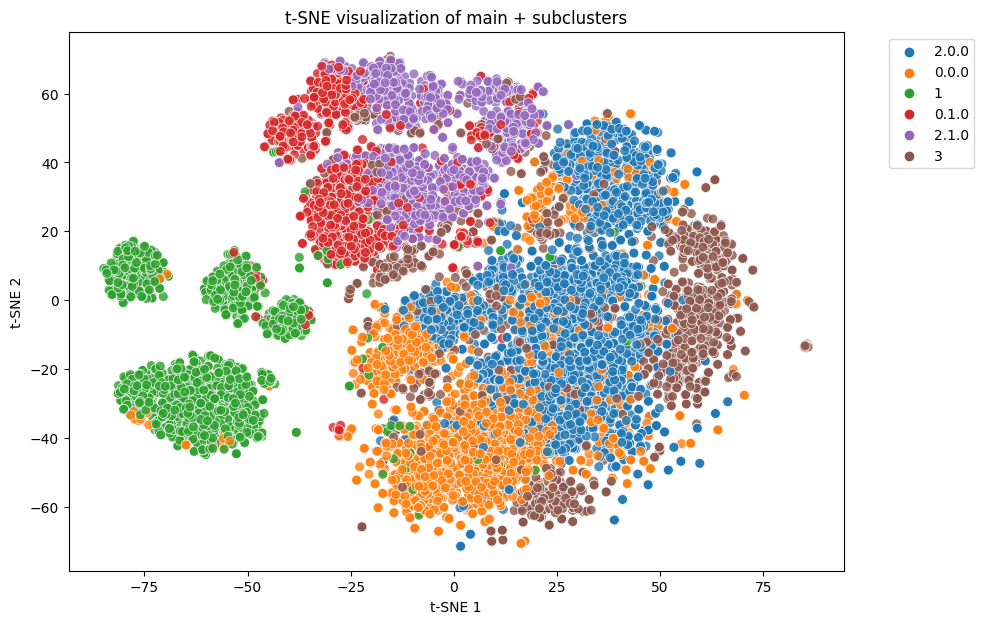

In [135]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import seaborn as sns

# 1️⃣ Encode categorical columns as integers for t-SNE
df_encoded = df.copy()
for col in categorical_cols:
    df_encoded[col] = df_encoded[col].astype('category').cat.codes

# 2️⃣ Select features for t-SNE (numerical + encoded categorical)
features = numerical_cols + categorical_cols
X = df_encoded[features].to_numpy()

# 3️⃣ Fit t-SNE
tsne = TSNE(n_components=2, random_state=42, perplexity=30, n_iter=1000)
X_embedded = tsne.fit_transform(X)

# 4️⃣ Add t-SNE coordinates to dataframe
df['TSNE_1'] = X_embedded[:,0]
df['TSNE_2'] = X_embedded[:,1]

# 5️⃣ Plot
plt.figure(figsize=(10,7))
sns.scatterplot(
    x='TSNE_1', y='TSNE_2',
    hue='Final_Cluster',
    palette='tab10',
    data=df,
    legend='full',
    s=50,
    alpha=0.8
)
plt.title("t-SNE visualization of main + subclusters")
plt.xlabel("t-SNE 1")
plt.ylabel("t-SNE 2")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


### Breaking down cluster 2.0.0 further

In [136]:
# 1️⃣ Filter cluster 2.1.0
subset = df[df['Final_Cluster'] == '2.0.0'].copy()
matrix = subset[numerical_cols + categorical_cols].to_numpy()
cat_idx = [subset.columns.get_loc(c) for c in categorical_cols]

# 2️⃣ Fit K-Prototypes (2 subclusters)
kproto = KPrototypes(
    n_clusters=2,
    init='Cao',
    n_init=5,
    max_iter=100,
    verbose=0,
    random_state=42
)
labels = kproto.fit_predict(matrix, categorical=cat_idx)

# 3️⃣ Assign subcluster labels back to main dataframe
df.loc[subset.index, 'Final_Cluster'] = labels
df.loc[subset.index, 'Final_Cluster'] = df.loc[subset.index, 'Final_Cluster'].apply(lambda x: f'2.1.0.{x}')


### Final Cluster size percentages

In [137]:

# 4️⃣ Check the new distribution
print(df['Final_Cluster'].value_counts(normalize=True).round(2) * 100)

0.0.0      19.0
2.1.0.1    18.0
1          17.0
3          13.0
2.1.0      12.0
0.1.0      11.0
2.1.0.0     9.0
Name: Final_Cluster, dtype: float64


# Final TSNE with 7 clusters

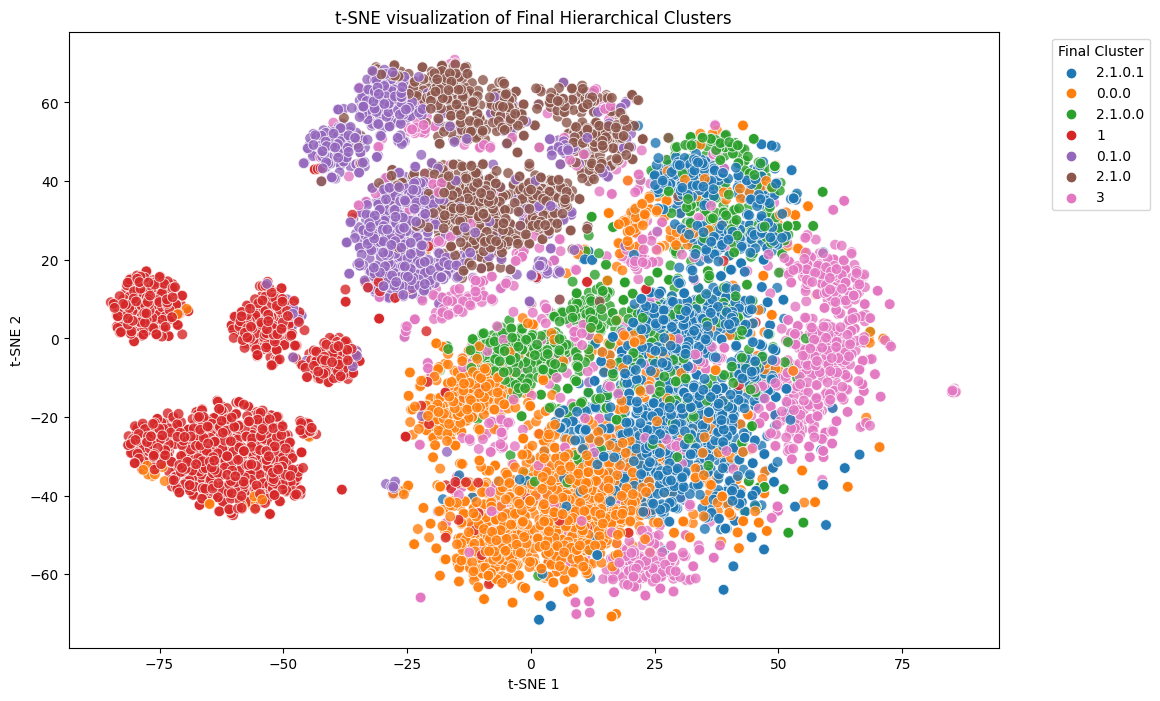

In [138]:
# 1️⃣ Encode categorical columns as integers for t-SNE
df_encoded = df.copy()
for col in categorical_cols:
    df_encoded[col] = df_encoded[col].astype('category').cat.codes

# 2️⃣ Select features for t-SNE (numerical + encoded categorical)
features = numerical_cols + categorical_cols
X = df_encoded[features].to_numpy()

# 3️⃣ Fit t-SNE
tsne = TSNE(n_components=2, random_state=42, perplexity=30, max_iter=1000)
X_embedded = tsne.fit_transform(X)

# 4️⃣ Add t-SNE coordinates to dataframe
df['TSNE_1'] = X_embedded[:,0]
df['TSNE_2'] = X_embedded[:,1]

# 5️⃣ Plot
plt.figure(figsize=(12,8))
sns.scatterplot(
    x='TSNE_1', y='TSNE_2',
    hue='Final_Cluster',
    palette='tab10',  # adjust if you have more than 10 clusters
    data=df,
    legend='full',
    s=60,
    alpha=0.8
)
plt.title("t-SNE visualization of Final Hierarchical Clusters")
plt.xlabel("t-SNE 1")
plt.ylabel("t-SNE 2")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', title='Final Cluster')
plt.show()


In [139]:
# List of essential columns to keep
essential_cols = numerical_cols + categorical_cols + ['Final_Cluster', 'TSNE_1', 'TSNE_2']

# Drop everything else
df_clean = df[essential_cols].copy()

# Check
print(df_clean.columns)


Index(['WBC', 'Haemoglobin', 'Platelete', 'Age', 'Household_Size',
       'Income_to_Poverty_Ratio', 'HDL_mg', 'Family_poverty_level_index',
       'Number_of_Moderate_Physical_activities_per_week',
       'Number_of_Vigorous_Physical_activities_per_week',
       'Number_of_hours_of_sleep', 'Cholestrol_level', 'SystolicBP',
       'DiastolicBP', 'Pulse', 'BODY_MEASURE_COMPOSITE', 'blood_macros',
       'mean_steroid_ng_dl', 'balance_symptom_score', 'balance_impact_score',
       'fall_risk_score', 'General_hearing_condition',
       'Had_high_blood_pressure', 'Gender', 'Race_Ethnicity',
       'Country_of_Birth', 'Education_Level', 'Marital_Status', 'Has_diabetes',
       'Takes_vitamin_supplements', 'Has_Disability', 'Has_Hepatitis',
       'Covered_by_health_insurance', 'Tested_for_HIV_Virus',
       'General_health_condition', 'Received_Hepatitis_A_Vaccine',
       'Has_Kidney_Failure', 'Had_Asthma', 'Had_Arthritis', 'Had_heart_attack',
       'Had_Thyroid', 'Had_Liver_COndition', '